# Классификация 

__План не сегодня:__
- Обзор датасета
- Обзор моделей + принципы работы
- Метрики классификации
- Что делать дальше ?

__Полезыне ссылки:__
- [Сравнение классификаторо](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
- [Все модели sklearn для supervised learning](https://scikit-learn.org/stable/supervised_learning.html)
- [Презентация про метрики и несбалансированные классы](https://ld86.github.io/ml-slides/unbalanced.html#/1)

__Какие модели решают задачу классификации:__
- K Nearest Neighbors
- Decision Tree
- Linear Models
- Support Vector Machines
- Naive Bayes
- Ensemble

K Nearest Neighbors
<img src='https://www.researchgate.net/profile/Saleh_Alaliyat/publication/267953942/figure/fig14/AS:295388776026147@1447437580523/K-nearest-neighbor-algorithm-illustration-The-green-circle-is-the-sample-which-is-to-be.png'>

Decision Tree
<img src='https://i.stack.imgur.com/wAQ5U.png'>

Linear models
<img src='https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png'>

SVM
<img src='https://miro.medium.com/max/1088/1*6U9NrruycDBsPOyivpn8UQ.png'>

__Метрики классификации:__
- Recall
- Precision
- Accuracy
- F score
- TPR = Recall
- FPR
- ROC-AUC
- PR-AUC

Confusion matrix
<img src='https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816'>

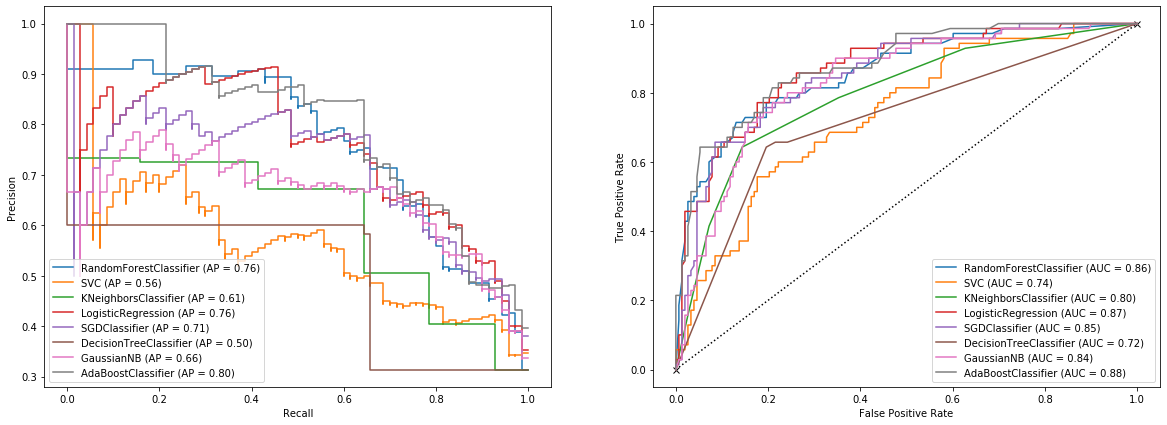

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    confusion_matrix, f1_score, classification_report


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
SEED = 96 #DON'T TOUCH

In [118]:
data = pd.read_csv('heart_data.csv')

In [177]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [119]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
data.shape

(303, 14)

In [121]:
X, y = data.drop(columns='target'), data.target

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=SEED)

In [123]:
X_train.shape, X_test.shape,\
y_train.shape, y_test.shape

((257, 13), (46, 13), (257,), (46,))

#### Decicsion Tree without tuning

In [124]:
tree = DecisionTreeClassifier(random_state=SEED)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=96, splitter='best')

In [ ]:
tree_pred = tree.predict(X_test)

In [125]:
accuracy_score(y_test, tree_pred)

0.782608695652174

#### DT tuning

In [126]:
tree_parametrs = {'max_depth':np.arange(3, 12), 'min_samples_split':np.arange(2, 5), 
                 'min_samples_leaf':np.arange(1, 5), 'max_features':np.arange(1, 14)}

In [256]:
better_tree = GridSearchCV(tree, tree_parametrs, cv=5, n_jobs=-1)

In [257]:
better_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=96,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([ 1,  2,  

In [158]:
btree_prediction = better_tree.predict(X_test)

In [129]:
better_tree.best_params_

{'max_depth': 3,
 'max_features': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [130]:
better_tree.best_score_

0.8210116731517509

In [162]:
confusion_matrix(btree_prediction, y_test)

array([[16,  3],
       [ 3, 24]])

In [159]:
accuracy_score(btree_prediction, y_test)

0.8695652173913043

In [160]:
recall_score(btree_prediction, y_test)

0.8888888888888888

In [161]:
precision_score(btree_prediction, y_test)

0.8888888888888888

In [167]:
print(classification_report(btree_prediction, y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1       0.89      0.89      0.89        27

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



#### KNearestNeighbours without tunning

In [132]:
kNN = KNeighborsClassifier()

In [133]:
kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [134]:
accuracy_score(kNN.predict(X_test), y_test)

0.5869565217391305

#### KNN tuning

In [135]:
neighbours_parametrs = {'n_neighbors':np.arange(1, 32), 'algorithm':['ball_tree', 'kd_tree'], 'p':[1, 2, 3]}

In [136]:
better_knn = GridSearchCV(kNN, neighbours_parametrs, cv=7, n_jobs=-1)

In [137]:
better_knn.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                         'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
better_knn.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1}

In [168]:
bknn_pred = better_knn.predict(X_test)

In [139]:
better_knn.best_score_

0.6926070038910506

In [154]:
confusion_matrix(better_knn.predict(X_test), y_test)

array([[13,  7],
       [ 6, 20]])

In [169]:
accuracy_score(bknn_pred, y_test)

0.717391304347826

In [170]:
precision_score(bknn_pred, y_test)

0.7407407407407407

In [171]:
recall_score(bknn_pred, y_test)

0.7692307692307693

In [176]:
print(classification_report(bknn_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.74      0.77      0.75        26

    accuracy                           0.72        46
   macro avg       0.71      0.71      0.71        46
weighted avg       0.72      0.72      0.72        46



#### SVC

In [242]:
vectors = SVC(C = 10, gamma = 0.001)

In [243]:
vectors.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [244]:
vector_predict = vectors.predict(X_test)

In [245]:
accuracy_score(vector_predict, y_test)

0.6304347826086957

In [238]:
confusion_matrix(vectors.predict(X_test), y_test)

array([[ 8,  6],
       [11, 21]])

In [246]:
print(classification_report(vector_predict, y_test))

              precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.78      0.66      0.71        32

    accuracy                           0.63        46
   macro avg       0.60      0.61      0.60        46
weighted avg       0.67      0.63      0.64        46



### Что дальше ?
- Документация Sklearn
- Посмотреть плейлист [Machine Learning](https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF) на канале StatQuest